C:\Users\cmc310\AppData\Local\Temp\ipykernel_35756\4278372325.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


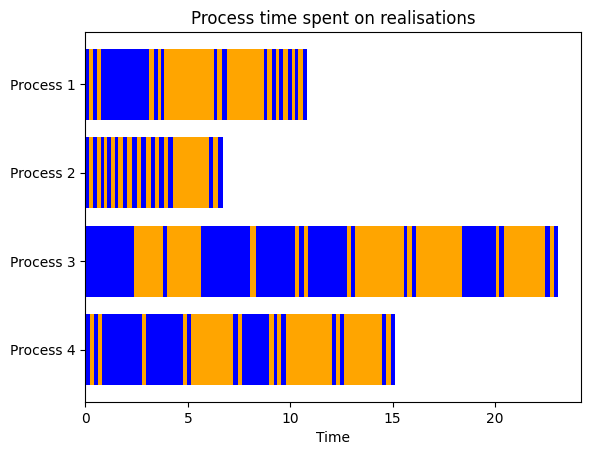

In [18]:
import random
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

short_time_mean = 0.2
short_time_sd = 0.03
long_time_mean = 2
long_time_sd = 0.3

short_time_pdf = norm(short_time_mean, short_time_sd)
long_time_pdf = norm(long_time_mean, long_time_sd)


def create_lengths(n_real, n_long, short_time_pdf, long_time_pdf):
    lengths = short_time_pdf.rvs(n_real)
    long_indices = random.sample(range(n_real), n_long)
    for idx in long_indices:
        lengths[idx] = long_time_pdf.rvs()

    return lengths

process_1_lengths = create_lengths(25, 3, short_time_pdf, long_time_pdf)
process_2_lengths = create_lengths(25, 1, short_time_pdf, long_time_pdf)
process_3_lengths = create_lengths(25, 10, short_time_pdf, long_time_pdf)
process_4_lengths = create_lengths(25, 6, short_time_pdf, long_time_pdf)

# Create a figure and axis
fig, ax = plt.subplots()

# Define the processes and their lengths
processes = [process_1_lengths, process_2_lengths, process_3_lengths, process_4_lengths]
process_labels = ['Process 1', 'Process 2', 'Process 3', 'Process 4']

# Plot each process as a stacked horizontal bar
for i, lengths in enumerate(reversed(processes)):
    lefts = np.cumsum(lengths)
    lefts = np.insert(lefts[:-1], 0, 0)
    ax.barh([process_labels[-(i+1)]] * len(lengths), lengths, left=lefts, color=colors[:len(lengths)])

# Set labels and title
ax.set_xlabel('Time')
ax.set_title('Process time spent on realisations')

# Show the plot
fig.show()
fig.savefig('queue_process_time.png')